In [1]:
import pickle

In [2]:
with open('loss_vs_time.pkl', 'rb') as f:
    data = pickle.load(f)

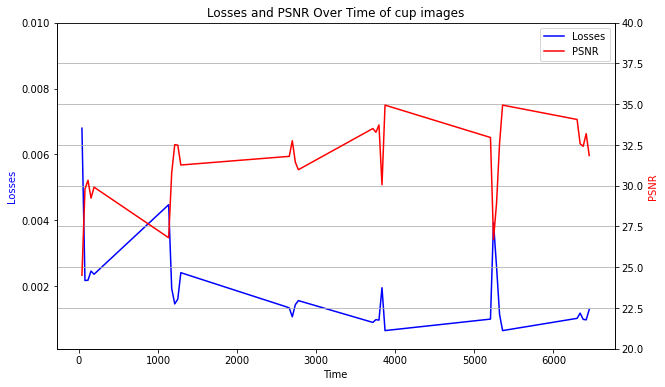

In [13]:
import matplotlib.pyplot as plt

# x축으로 사용할 데이터
time = data['time']

# y축으로 사용할 데이터
losses = data['losses']
psnr = data['psnr']

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))  # 그래프 크기 설정

# 왼쪽 y축 (Losses)
ax1.plot(time, losses, label='Losses', linestyle='-', color='b')
ax1.set_xlabel('Time')
ax1.set_ylabel('Losses', color='b')
ax1.set_ylim(0.0001, 0.01)  # 왼쪽 y축 범위 설정

# 오른쪽 y축 (PSNR)
ax2 = ax1.twinx()
ax2.plot(time, psnr, label='PSNR', linestyle='-', color='r')
ax2.set_ylabel('PSNR', color='r')
ax2.set_ylim(20, 40)  # 오른쪽 y축 범위 설정

# 그래프 제목과 범례 설정
plt.title('Losses and PSNR Over Time of cup images')
plt.grid(True)  # 그리드 표시

# 범례 추가
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# 그래프 표시
plt.show()

In [5]:
with open('./testset_001000/test_psnrs_avg28.56.pkl', 'rb') as f:
    psnr_avg = pickle.load(f)

In [6]:
# x축으로 사용할 데이터
time = psnr_avg['time']

# y축으로 사용할 데이터
psnr = psnr_avg['psnr']
losses = psnr_avg['losses']

# 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.plot(time, psnr, label='PSNR', marker='o', linestyle='-', color='b')
plt.plot(time, losses, label='Losses', marker='x', linestyle='-', color='r')

# 그래프 제목과 레이블 설정
plt.title('PSNR and Losses Over Time')
plt.xlabel('Time')
plt.ylabel('Value')

# 범례 추가
plt.legend()

# 그래프 표시
plt.grid(True)  # 그리드 표시
plt.show()

TypeError: list indices must be integers or slices, not str

In [7]:
psnr_avg

[26.696207700484536,
 30.933421108596562,
 25.730120846939542,
 30.733442431717833,
 28.21908463175454,
 30.32252825606172,
 28.532290830708924,
 30.49810262878564,
 27.63841440276019,
 27.412380557669053,
 31.595299011154584,
 29.97317936003192,
 27.444646010912088,
 26.564728188851205,
 27.91589041540076,
 26.68867817633292]

In [21]:
import cv2
import os

# 이미지 파일들이 있는 디렉토리 경로
image_folder = '../../images_230914002521'

# 저장할 동영상 파일 경로와 설정
video_name = 'output_video.avi'
fps = 20  # FPS 설정 (예: 80)

# 이미지 파일 목록 가져오기
images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

# 동영상 인코더 설정
fourcc = cv2.VideoWriter_fourcc(*'XVID')
video = cv2.VideoWriter(video_name, fourcc, fps, (width, height))

for image in images:
    img_path = os.path.join(image_folder, image)
    frame = cv2.imread(img_path)
    video.write(frame)

cv2.destroyAllWindows()
video.release()

In [ ]:
import 